<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/Midterm_Recognition_Viet_Nam_Food_build_with_ANN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load dataset Viet Nam Food 

In [3]:
!ls gdrive/MyDrive/DataSetFood # test data

TestingSet.zip	TrainingSet.zip


In [4]:
# Unzip Test and Train data
! unzip gdrive/MyDrive/DataSetFood/TestingSet.zip
! unzip gdrive/MyDrive/DataSetFood/TrainingSet.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: TrainingSet/Bun bo Hue/BunBoHue (700).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (701).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (702).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (703).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (704).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (705).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (706).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (707).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (708).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (709).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (71).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (710).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (711).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (712).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (713).jpg  
  inflating: TrainingSet/Bun bo Hue/BunBoHue (714).jpg  
  inflating: TrainingSet/Bun bo 

In [6]:
# Check testdata
!ls TestingSet/| wc -l

11


In [7]:
!ls TrainingSet/| wc -l

11


In [ ]:
list = ["Banh gio","Banh mi","Banh tet","Bun bo Hue",
         "Bun rieu","Canh chua","Canh chua","Chao long",
         "Com tam","Hu tieu","Mi quang","Pho"] 
for item in list:
    !ls "TrainingSet/{item}" | wc -l

In [ ]:
list = ["Banh gio","Banh mi","Banh tet","Bun bo Hue",
         "Bun rieu","Canh chua","Canh chua","Chao long",
         "Com tam","Hu tieu","Mi quang","Pho"] 
for item in list:
    !ls "TestingSet/{item}" | wc -l

# Preprocessing Data

In [47]:
import tensorflow as tf
from pathlib import Path

In [48]:
train_root = Path('TrainingSet/')
testing_root=Path('TestingSet/')
# convert to string type
filelist_train= tf.data.Dataset.list_files(str(train_root/'*/*')) # 2 level scan (train_root to folders 0 - 9 then access each one)
filelist_test= tf.data.Dataset.list_files(str(testing_root/'*/*')) # 2 level scan (train_root to folders 0 - 9 then access each one)
# 9 random elements
for file in filelist_train.take(9):
  print(file) #filename path in tf.data

tf.Tensor(b'TrainingSet/Chao long/ChaoLong (479).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Hu tieu/HuTieu (620).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Hu tieu/HuTieu (643).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Bun bo Hue/BunBoHue (498).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Bun rieu/BunRieu (360).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Canh chua/CanhChua (365).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Pho/Pho (4).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Bun rieu/BunRieu (539).jpg', shape=(), dtype=string)
tf.Tensor(b'TrainingSet/Mi quang/MiQuang (95).jpg', shape=(), dtype=string)


In [49]:
def get_label(file_path):
  parts = tf.strings.split(file_path, '/')
  #part[0] = train
  #part[1] = 0/1.../11
  #part[2] = filename
  if parts[-2] == "Banh gio":
    labels=[1,0,0,0,0,0,0,0,0,0,0] #0
  elif parts[-2] == "Banh mi":
    labels=[0,1,0,0,0,0,0,0,0,0,0] #1
  elif parts[-2] == "Banh tet":
    labels=[0,0,1,0,0,0,0,0,0,0,0] #2
  elif parts[-2] == "Bun bo Hue":
    labels=[0,0,0,1,0,0,0,0,0,0,0] #3
  elif parts[-2] == "Bun rieu":
    labels=[0,0,0,0,1,0,0,0,0,0,0] #4
  elif parts[-2] == "Canh chua":
    labels=[0,0,0,0,0,1,0,0,0,0,0] #5
  elif parts[-2] == "Chao long":
    labels=[0,0,0,0,0,0,1,0,0,0,0] #6
  elif parts[-2] == "Com tam":
    labels=[0,0,0,0,0,0,0,1,0,0,0] #7
  elif parts[-2] == "Hu tieu":
    labels=[0,0,0,0,0,0,0,0,1,0,0] #8
  elif parts[-2] == "Mi quang":
    labels=[0,0,0,0,0,0,0,0,0,1,0] #9
  else: 
    labels=[0,0,0,0,0,0,0,0,0,0,1] #10
    #return labels value but have to convert to tensor becase string we use is python not tf.tensor
  return tf.convert_to_tensor(labels) 

In [50]:
# Test training file
for file in filelist_train.take(11):
  print('filename',file.numpy().decode('utf-8')) # utf8 bỏ tf.tensor
  print('label:',get_label(file).numpy())

filename TrainingSet/Canh chua/CanhChua (314).jpg
label: [0 0 0 0 0 1 0 0 0 0 0]
filename TrainingSet/Com tam/ComTam (229).jpg
label: [0 0 0 0 0 0 0 1 0 0 0]
filename TrainingSet/Bun rieu/BunRieu (685).jpg
label: [0 0 0 0 1 0 0 0 0 0 0]
filename TrainingSet/Banh mi/BanhMi (789).jpg
label: [0 1 0 0 0 0 0 0 0 0 0]
filename TrainingSet/Mi quang/MiQuang (448).jpg
label: [0 0 0 0 0 0 0 0 0 1 0]
filename TrainingSet/Pho/Pho (428).jpg
label: [0 0 0 0 0 0 0 0 0 0 1]
filename TrainingSet/Chao long/ChaoLong (204).jpg
label: [0 0 0 0 0 0 1 0 0 0 0]
filename TrainingSet/Canh chua/CanhChua (245).jpg
label: [0 0 0 0 0 1 0 0 0 0 0]
filename TrainingSet/Com tam/ComTam (67).jpg
label: [0 0 0 0 0 0 0 1 0 0 0]
filename TrainingSet/Hu tieu/HuTieu (617).jpg
label: [0 0 0 0 0 0 0 0 1 0 0]
filename TrainingSet/Chao long/ChaoLong (548).jpg
label: [0 0 0 0 0 0 1 0 0 0 0]


In [51]:
# Test test file
for file in filelist_test.take(11):
  print('filename',file.numpy().decode('utf-8')) # utf8 bỏ tf.tensor
  print('label:',get_label(file).numpy())

filename TestingSet/Bun bo Hue/BunBoHue (165).jpg
label: [0 0 0 1 0 0 0 0 0 0 0]
filename TestingSet/Bun bo Hue/BunBoHue (5).jpg
label: [0 0 0 1 0 0 0 0 0 0 0]
filename TestingSet/Banh mi/BanhMi (175).jpg
label: [0 1 0 0 0 0 0 0 0 0 0]
filename TestingSet/Banh mi/BanhMi (257).jpg
label: [0 1 0 0 0 0 0 0 0 0 0]
filename TestingSet/Banh mi/BanhMi (211).jpg
label: [0 1 0 0 0 0 0 0 0 0 0]
filename TestingSet/Banh mi/BanhMi (237).jpg
label: [0 1 0 0 0 0 0 0 0 0 0]
filename TestingSet/Com tam/ComTam (38).jpg
label: [0 0 0 0 0 0 0 1 0 0 0]
filename TestingSet/Bun bo Hue/BunBoHue (125).jpg
label: [0 0 0 1 0 0 0 0 0 0 0]
filename TestingSet/Bun rieu/BunRieu (57).jpg
label: [0 0 0 0 1 0 0 0 0 0 0]
filename TestingSet/Mi quang/MiQuang (35).jpg
label: [0 0 0 0 0 0 0 0 0 1 0]
filename TestingSet/Mi quang/MiQuang (108).jpg
label: [0 0 0 0 0 0 0 0 0 1 0]


In [52]:
from tensorflow._api.v2 import image
# Preprocessing function 
img_height = 180
img_width = 180
def preprocessing(file_path): #data we have just a file list but data for train model must be pixel value
  # Read file
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img,channels=3) # 1 is gray, 3 is color; we use image function of tf.image ; jpeg because jpg is our flie
  # Transform
    # Conver from uint 8 to float 32 and Normalize value to [0,1]
  img = tf.image.convert_image_dtype(img,tf.float32)
    # Resize
  img = tf.image.resize(img,[img_width,img_height])
    # Get image label
  label = get_label(file_path)
  print(img.shape)
  # Return
  return img, label

In [53]:
ds_size = 25000 #(shuffle size) 
# Set parameter
batch_size = 32
# Build data
train_ds = filelist_ds.shuffle(ds_size) # Shuffling the input and it doesn't have labels
train_ds = train_ds.map(preprocessing,num_parallel_calls=tf.data.AUTOTUNE) # Process each element + get labels => train_ds = pixel val and labels
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(6) # chia luồn data

(180, 180, 3)


# Build Model 

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 176, 176, 10)      760       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 88, 88, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 84, 84, 20)        5020      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 42, 42, 20)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 42, 42, 20)        0   

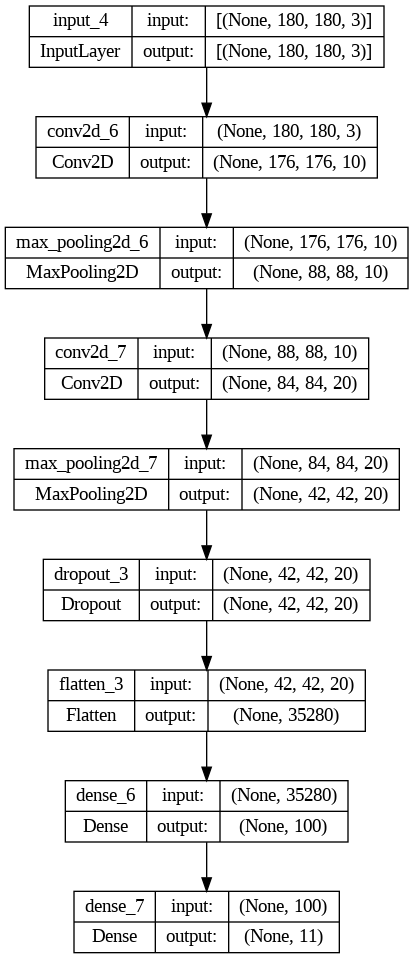

In [54]:

import tensorflow as tf
from tensorflow.keras import layers
#build model
model = tf.keras.Sequential()
inputs = tf.keras.Input(shape=(img_width,img_height,3))
x = layers.Conv2D(10,5,strides=(1,1),padding = 'valid',activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Conv2D(20,5,strides=(1,1),padding='valid',activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(100,activation='relu')(x)
output = layers.Dense(11, activation ='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=output)
# Show neural network
model.summary()
# Draw Graph
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)

# Compile and Training Model

In [55]:
# Compile model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=["accuracy"] #caculate accuracy on each batch
)

In [56]:
# Train model
model.fit(train_ds, epochs = 15)

Epoch 1/15
238/238 [==============================] - 85s 348ms/step - loss: 2.2810 - accuracy: 0.1885
Epoch 2/15
238/238 [==============================] - 84s 354ms/step - loss: 2.0256 - accuracy: 0.3044
Epoch 3/15
238/238 [==============================] - 83s 348ms/step - loss: 1.4908 - accuracy: 0.5054
Epoch 4/15
238/238 [==============================] - 84s 350ms/step - loss: 0.7541 - accuracy: 0.7533
Epoch 5/15
238/238 [==============================] - 84s 352ms/step - loss: 0.2831 - accuracy: 0.9152
Epoch 6/15
238/238 [==============================] - 84s 351ms/step - loss: 0.1512 - accuracy: 0.9576
Epoch 7/15
238/238 [==============================] - 83s 350ms/step - loss: 0.0959 - accuracy: 0.9750
Epoch 8/15
238/238 [==============================] - 84s 352ms/step - loss: 0.0683 - accuracy: 0.9830
Epoch 9/15
238/238 [==============================] - 84s 352ms/step - loss: 0.0515 - accuracy: 0.9862
Epoch 10/15
238/238 [==============================] - 89s 376ms/step - l

In [57]:
model.save('VietNamFoodANNmodel.h5')

1/1 [==============================] - 0s 139ms/step


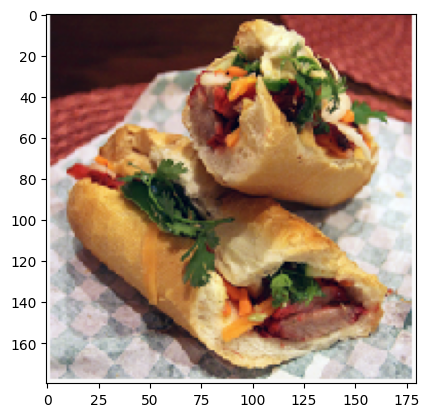

Banh mi


In [61]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

my_dict = {0: 'Banh gio', 1: 'Banh mi', 2: 'Banh tet', 3: 'Bun bo Hue', 4: 'Bun rieu', 
           5: 'Canh chua', 6: 'Chao long', 7: 'Com tam', 8: 'Hu tieu', 9: 'Mi quang', 10: 'Pho'}

img = load_img("Bánh mì 1.jpg", target_size=(180, 180))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 180, 180, 3)
img = img.astype('float32')
img = img / 255
result = np.argmax(model.predict(img), axis=1)
plt.show()
print(my_dict[result[0]])



1/1 [==============================] - 0s 32ms/step


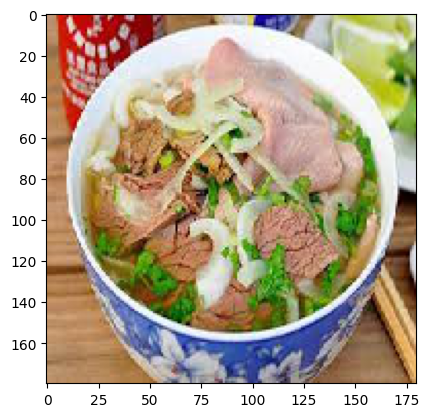

Pho


In [62]:
img = load_img("Phớ.jpg", target_size=(180, 180))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 180, 180, 3)
img = img.astype('float32')
img = img / 255
result = np.argmax(model.predict(img), axis=1)
plt.show()
print(my_dict[result[0]])
